<a href="https://colab.research.google.com/github/SSUcheese/computer_vision_lecture_review/blob/main/selective_search_n_iou_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## selective search를 이용해 object detection을 위한 region proposal 영역을 도출

### selectivesearch 설치 및 이미지 로드

In [10]:
pip install selectivesearch

In [2]:
!pwd

/content


In [3]:
# data를 담을 디렉토리를 content 밑에 생성
# 참고로 !wget -O를 통해 지정된 웹 주소에서 받은 파일을 지정된 디렉토리의 설정한 이름으로 지정

!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

--2024-04-16 10:37:26--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0.002s  

2024-04-16 10:37:26 (12.5 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



(450, 375, 3)


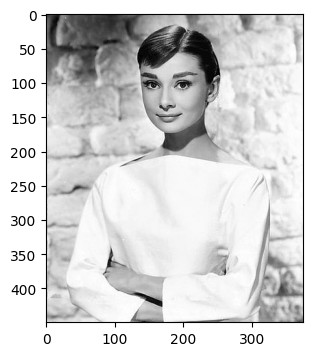

In [4]:
import selectivesearch
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

# audrey 이미지를 cv2로 부르고 시각화
img = cv2.imread('/content/data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.show()

In [5]:
# selectivesearch.selective_search()는 이미지의 Region Proposal 정보를 반환
# scale을 키우면 큰 object 위주로 탐색하고 작게 설정하면 그 반대
# 아래 코드에선 객체 크기가 2000 이상인 object만 고른다.
# 또한 selectivesearch.selective_search()의 returns에서 첫 번째는 큰 의미가 없어 _로 처리.

_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

# regions의 len 뜻은 obj가 있을 것으로 추정되는 공간으로 41개 박스를 만들었다는 뜻이다.
print(type(regions), len(regions))
print(regions)

<class 'list'> 41
[{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]}, {'rect': (15, 0, 129, 110), 'size': 8771, 'labels': [1.0]}, {'rect': (121, 0, 253, 133), 'size': 17442, 'labels': [2.0]}, {'rect': (134, 17, 73, 62), 'size': 2713, 'labels': [3.0]}, {'rect': (166, 23, 87, 176), 'size': 8639, 'labels': [4.0]}, {'rect': (136, 53, 88, 121), 'size': 4617, 'labels': [5.0]}, {'rect': (232, 79, 117, 147), 'size': 7701, 'labels': [6.0]}, {'rect': (50, 91, 133, 123), 'size': 7042, 'labels': [7.0]}, {'rect': (305, 97, 69, 283), 'size': 11373, 'labels': [8.0]}, {'rect': (0, 161, 70, 46), 'size': 2363, 'labels': [9.0]}, {'rect': (72, 171, 252, 222), 'size': 34467, 'labels': [10.0]}, {'rect': (0, 181, 118, 85), 'size': 5270, 'labels': [11.0]}, {'rect': (106, 210, 89, 101), 'size': 2868, 'labels': [12.0]}, {'rect': (302, 228, 66, 96), 'size': 2531, 'labels': [13.0]}, {'rect': (0, 253, 92, 134), 'size': 7207, 'labels': [14.0]}, {'rect': (153, 270, 173, 179), 'size': 10360, 'labels': [15.0]

### 위 과정을 통해 반환된 region proposal에 대한 정보 확인 및 bounding box 시각화
* 반환된 regions 변수는 리스트 타입이지만 세부 원소로 안에 dictionary를 갖고 있다.
* rect는 bouding box의 좌측 상단 x,y 값과 bounding box의 너비와 높이를 의미한다.
* size는 segment로 뽑힌 object의 크기이다.
* labels는 해당 bounding box 내에 있는 object들의 고유 ID. 하나의 bouding box 안에 여러 object가 있을 수 있다.
* 참고로 list 요소는 뒤로 갈수록 큰 bounding box가 있는데, 앞에 있는 복수의 bounding box를 합친 것이다.

In [6]:
regions[0]

{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]}

In [7]:
# rect 정보만 출력해서 보기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


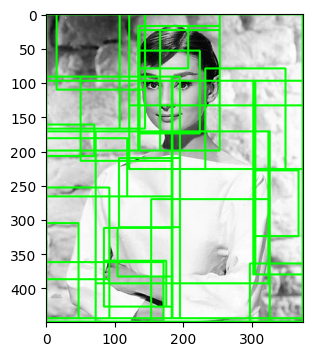

In [8]:
# opencv의 rectangle()을 이용해서 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box 색깔 및 두께를 인자로 입력하면 이를 반영

green_rgb = (0, 255, 0)
img_rgb_copy = img_rgb.copy()  # 되도록 원본 이미지가 아닌 따로 copy로 따와서 보는 편이 낫다.
for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy,(left, top), (right, bottom), color=green_rgb, thickness=2)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb_copy)
plt.show()

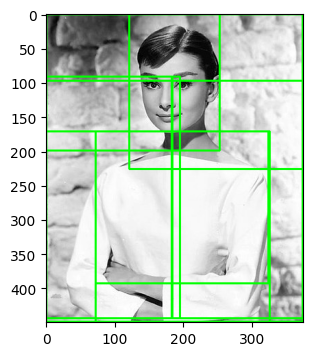

In [9]:
# bouding box에서 크기가 큰 후보만 추출

cand_rects = [cand['rect'] for cand in regions if cand['size'] > 20000]

green_rgb = (0, 255, 0)
img_rgb_copy = img_rgb.copy()  # 되도록 원본 이미지가 아닌 따로 copy로 따와서 보는 편이 낫다.
for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy,(left, top), (right, bottom), color=green_rgb, thickness=2)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb_copy)
plt.show()

## IOU를 구하기
* area of overlap / area of union로 게산한다.
* IOU란 intersection over union의 약자로 model이 예측한 결과와 ground truth 실측 box가 얼마나 겹치는지 계산한 지표이다.
* 0~1로 사이의 값에서 1에 가까울수록 정확하게 예측한 것이라고 할 수 있다.


In [12]:
import os
import numpy as np

# cand_box는 내가 예측해서 얻어낸 후보 박스
# gt_box는 ground_thruth 박스로 기존에 알맞던 정답 박스
def compute_iou(cand_box, gt_box):

  # 겹치는 영역 계산
  x1 = np.maximum(cand_box[0], gt_box[0])
  y1 = np.maximum(cand_box[1], gt_box[1])
  x2 = np.minimum(cand_box[2], gt_box[2])
  y2 = np.minimum(cand_box[3], gt_box[3])

  intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)

  cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
  gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
  union = cand_box_area + gt_box_area - intersection

  iou = intersection / union
  return iou

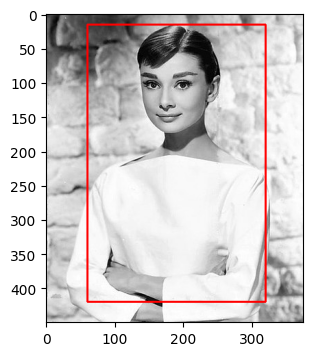

In [13]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 실제 box의 좌표를 아래와 같다고 가정
# regions는 x y w h 순서인데 gt_box는 각각 좌상단 우하단 좌표값이라 주의
gt_box = [60, 15, 320, 420]

img = cv2.imread('/content/data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0, 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.show()

In [14]:
import selectivesearch

img = cv2.imread('/content/data/audrey01.jpg')
img_rgb2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, regions = selectivesearch.selective_search(img_rgb2, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 41


In [17]:
[cand['rect'] for cand in regions][0]

(0, 0, 107, 167)

In [18]:
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
  cand_box = list(cand_box)  # 좌표값이 tuple 형태로 나와서 list로 변환
  # 여기 cand_rects 안에 값은 좌상단 좌표와 상자의 너비, 높이 정보가 있다.
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)
  print(index, iou)

0 0.06157293686705451
1 0.07156308851224105
2 0.2033654637255666
3 0.04298195631528965
4 0.14541310541310543
5 0.10112060778727446
6 0.11806905615946989
7 0.1420163334272036
8 0.035204259342190375
9 0.004256894317971497
10 0.5184766640298338
11 0.04465579710144928
12 0.0853656220322887
13 0.015722240419259743
14 0.037833068643021
15 0.22523535071077264
16 0.0
17 0.053941120607787274
18 0.05154006626579948
19 0.05660327592118798
20 0.01165009904393209
21 0.18588082901554404
22 0.19555555555555557
23 0.5409250175192712
24 0.205679012345679
25 0.042245111210628454
26 0.34848824374009246
27 0.18588082901554404
28 0.10952135872362326
29 0.29560078245307364
30 0.045470015655843715
31 0.3126506582607083
32 0.4934902582553282
33 0.5490037131949166
34 0.1018867924528302
35 0.31513409961685823
36 0.3423913043478261
37 0.6341234282410753
38 0.6270619201314865
39 0.6270619201314865
40 0.6270619201314865


In [20]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 107, 167),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 91, 183, 175),
 (0, 91, 183, 175),
 (0, 91, 183, 353),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 97, 374, 352),
 (0, 171, 326, 278),
 (0, 181, 118, 85),
 (0, 253, 92, 134),
 (0, 253, 92, 191),
 (0, 362, 171, 87),
 (15, 0, 129, 110),
 (50, 91, 133, 123),
 (72, 171, 252, 222),
 (72, 171, 254, 278),
 (84, 312, 100, 115),
 (121, 0, 253, 133),
 (121, 0, 253, 226),
 (134, 17, 119, 182),
 (136, 23, 117, 176),
 (153, 270, 173, 179),
 (166, 23, 87, 176),
 (232, 79, 117, 147),
 (297, 364, 77, 85),
 (302, 97, 72, 283),
 (305, 97, 69, 283)]

(450, 375, 3)
8 0.5184766640298338 (72, 171, 324, 393)
18 0.5409250175192712 (72, 171, 326, 449)
28 0.5490037131949166 (0, 97, 374, 449)
32 0.6341234282410753 (0, 0, 374, 444)
33 0.6270619201314865 (0, 0, 374, 449)
34 0.6270619201314865 (0, 0, 374, 449)
35 0.6270619201314865 (0, 0, 374, 449)


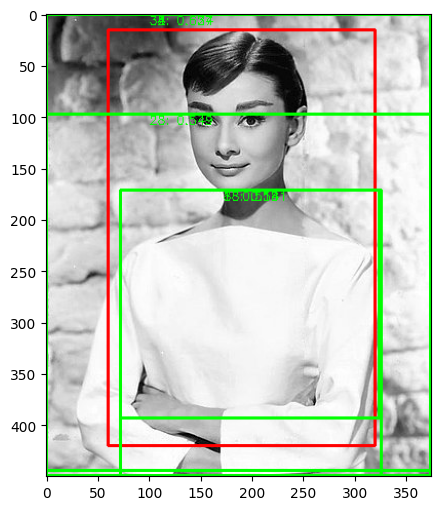

In [25]:
img = cv2.imread('/content/data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

green_rgb = (0, 255, 0)
cand_rects = [rect['rect'] for rect in regions if rect['size'] > 3000]
gt_box = [60, 15, 320, 420]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index, cand_box in enumerate(cand_rects):

  cand_box = list(cand_box)
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)

  if iou > 0.5:
    print(index, iou, (cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
    cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=2)
    text = "{}: {:.3f}".format(index, iou)
    cv2.putText(img_rgb, text,  (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.show()